In [2]:
import h5py
import sys
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import make_smoothing_spline, make_splrep, interp1d, BSpline

import importlib 
import tools
importlib.reload(tools)

from tools import bin_data  

In [27]:
energiest = np.empty(0)
naivet = np.empty(0)
detailedt = np.empty(0)
edept=np.empty(0)

file_ns = range(54)
for n in file_ns:
    datat = np.load(f'/sdf/data/neutrino/summer25/seohyeon/edep_estimators/muon1k_0-1gev_estimators_edep_run{n}.npz')

    energiest = np.append(energiest, datat['energies'])
    naivet = np.append(naivet, datat['naive'])
    detailedt = np.append(detailedt, datat['detailed'])
    edept = np.append(edept, datat['edeps'])


datag = np.load('/sdf/data/neutrino/summer25/seohyeon/gampix_estimators/muon1k_0-1gev_estimators_gampix_cleaned.npz')

energiesg = datag['energies']
naiveg = datag['naive']
detailedg = datag['detailed']
evsg = datag['evs'].astype(int)

mask = (energiesg > 150) & (energiesg < 850)
naiveg = naiveg[mask]
detailedg = detailedg[mask]
energiesg = energiesg[mask]


energiest_cut = energiest[evsg]
naivet_cut = naivet[evsg]
detailedt_cut = detailedt[evsg]


mask = (energiest_cut > 150) & (energiest_cut < 850)
naivet_cut = naivet_cut[mask]
detailedt_cut = detailedt_cut[mask]
energiest_cut = energiest_cut[mask]

splinest = np.load('/sdf/data/neutrino/summer25/seohyeon/efxns/efxns54k_truth.npz')

naivet_spl = BSpline(splinest['naive_t'], splinest['naive_c'], splinest['naive_k'])
detailedt_spl = BSpline(splinest['detailed_t'], splinest['detailed_c'], splinest['detailed_k'])

splinesg = np.load('/sdf/data/neutrino/summer25/seohyeon/efxns/efxns_54k_gampix.npz')

naiveg_spl = BSpline(splinesg['naive_t'], splinesg['naive_c'], splinesg['naive_k'])
detailedg_spl = BSpline(splinesg['detailed_t'], splinesg['detailed_c'], splinesg['detailed_k'])

print(len(energiest_cut))

22297


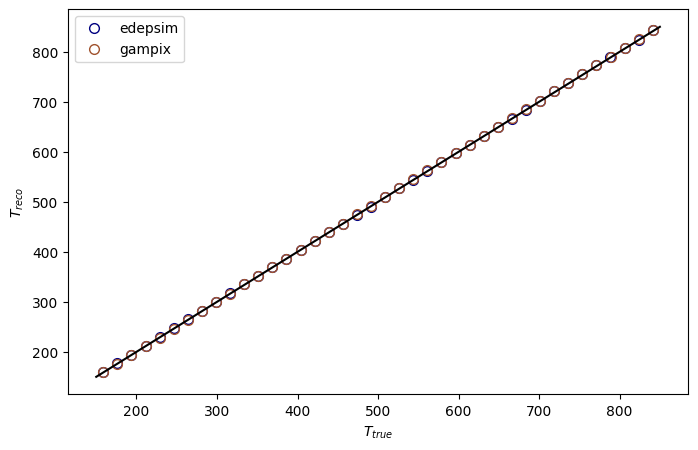

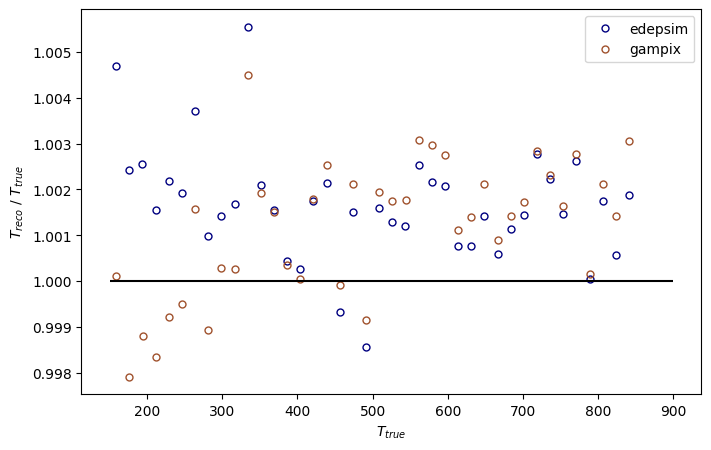

In [24]:
truth_x, truth_y, truth_error, _ = bin_data(energiest_cut, detailedt_spl(detailedt_cut), 40)
gampix_x, gampix_y, gampix_error, _ = bin_data(energiesg, detailedg_spl(detailedg), 40)

# T_reco vs T_true

plt.figure(figsize=(8, 5))
# plt.xlim(200, 400)
# plt.ylim(100, 400)
plt.plot(truth_x, truth_y, 'o', markerfacecolor='none', label='edepsim', color='navy', ms=7)
plt.plot(gampix_x, gampix_y, 'o', markerfacecolor='none', label='gampix', color='sienna', ms=7)
x2 = np.linspace(150, 850, 40)
plt.plot(x2, x2, color='black')
plt.xlabel(r'$T_{true}$')
plt.ylabel(r'$T_{reco}$')
plt.legend()
plt.savefig('plots/reco/overview.png')



plt.figure(figsize=(8, 5))
plt.plot(np.array(truth_x), np.array(truth_y) / np.array(truth_x), 'o', label='edepsim', markerfacecolor='none', color='navy', ms=5)
plt.plot(np.array(gampix_x), np.array(gampix_y) / np.array(gampix_x), 'o', label='gampix', markerfacecolor='none', color='sienna', ms=5)
plt.xlabel(r'$T_{true}$')
plt.ylabel(r'$T_{reco} \ / \ T_{true}$')
plt.legend()
plt.hlines(y=1, xmin=150, xmax=900, color='black')
plt.savefig('plots/reco/reco_true_ratio.png')



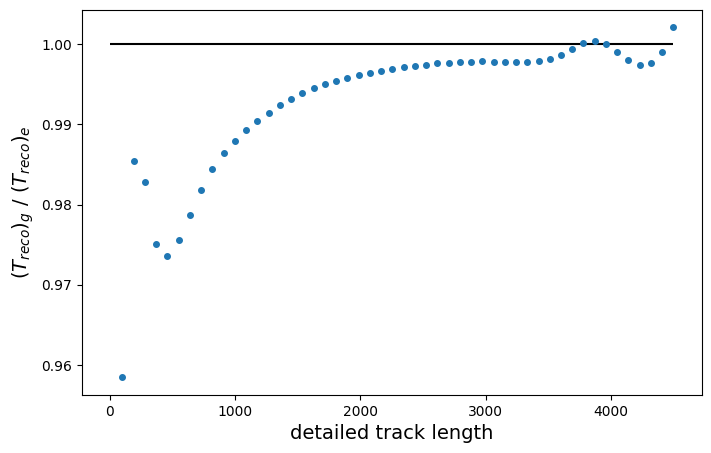

In [21]:
x = np.linspace(100, 4500, 50)

# the energy fxn is not constant! 
# T_reco_g / T_reco_t vs. arbitrary
# plt.figure()
# plt.hlines(y=1, xmin=0, xmax=4500, color='black')
# plt.plot(x, naiveg_spl(x) / naivet_spl(x), 'o')
# plt.xlabel('naive track length', fontsize=14)
# plt.ylabel(r'$(T_{reco})_g \ / \ (T_{reco})_e$', fontsize=14)

plt.figure(figsize=(8, 5))
plt.hlines(y=1, xmin=0, xmax=4500, color='black')
plt.plot(x, detailedg_spl(x) / detailedt_spl(x), 'o', ms=4)
plt.xlabel('detailed track length', fontsize=14)
plt.ylabel(r'$(T_{reco})_g \ / \ (T_{reco})_e$', fontsize=14)
plt.savefig('plots/reco/gampix_edep_ratio.png')

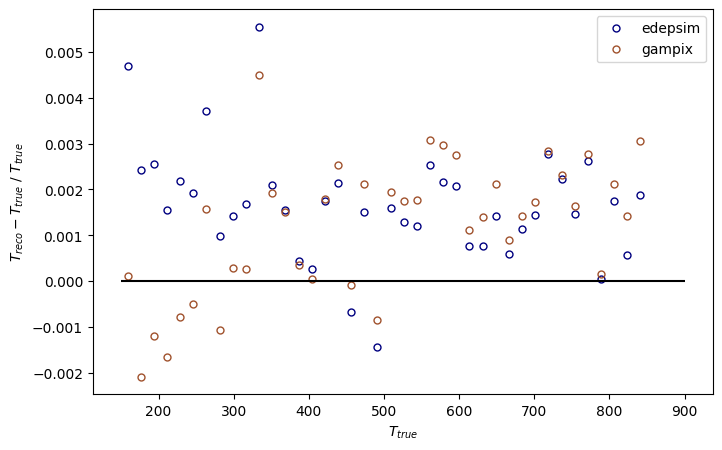

In [22]:
truth_res = np.array(truth_y) - np.array(truth_x)
truth_rres = truth_res / truth_x

gampix_res = np.array(gampix_y) - np.array(gampix_x)
gampix_rres = gampix_res / gampix_x

# accuracy vs. true energy
plt.figure(figsize=(8, 5))
plt.plot(truth_x, truth_rres, 'o', markerfacecolor='none', label='edepsim', color='navy', ms=5)
plt.plot(gampix_x, gampix_rres, 'o', markerfacecolor='none', label='gampix', color='sienna', ms=5)
plt.hlines(y=0, xmin=150, xmax=900, color='black')
plt.legend()
plt.xlabel('$T_{true}$')
plt.ylabel('$T_{reco} - T_{true} \ / \ T_{true}$')
plt.savefig('plots/reco/rres.png')